## Import library

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

## Read file

In [5]:
diabetes = pd.read_csv("diabetes.csv", delimiter=';',header=0)
student = pd.read_csv("StudentScore.csv", header=0)

## Visualize data

### Diabetes dataset

In [9]:
# View data
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# Check NA, datatype of each variable
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


With the diabetes dataset, we have all of features quantitatives variables.

In [11]:
# Check distribution of each variable
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


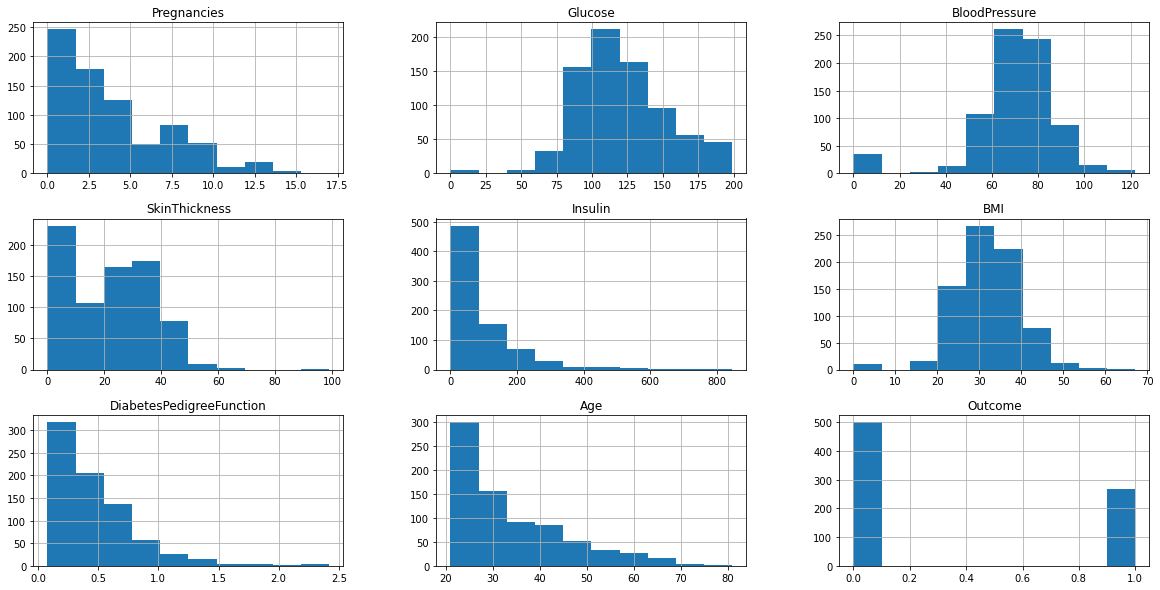

In [14]:
# Check distribution of each variable
diabetes.hist(figsize=(20,10))
plt.show()

We notice that there are outliers in the variables Glucose, BloodPressure and BMI. The above variables cannot be 0 in living people (observations), it could be a missing value or an error in the data collection step.
The SkinThickness has outliers with values up to 99mm (abnormal). 
I think with 2 variables SkinThickness and Insulin, we have many observations with 0 values because they did not perform these tests.

I suggest :
- Delete observations with value 0 in the variable Glucose, BloodPressure, BMI
- Delete observations with value 99 in the variable SkinThickness
- Verify observations with value 0 in the variable SkinThickness, Insulin (replace with the mean/median/mode value or use some method to hanlde NA such as prediction models/Imputation/etc)


### Student dataset

In [15]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
# Check NA, datatype of each variable
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


With the student dataset, we have 4 types of variables:
- Categorical variable : race/ethnicity
- Binary variable : gender, lunch
- Ordinal variable : parental leval of education
- Quantitative variable : math score, reading score, reading score, writing score

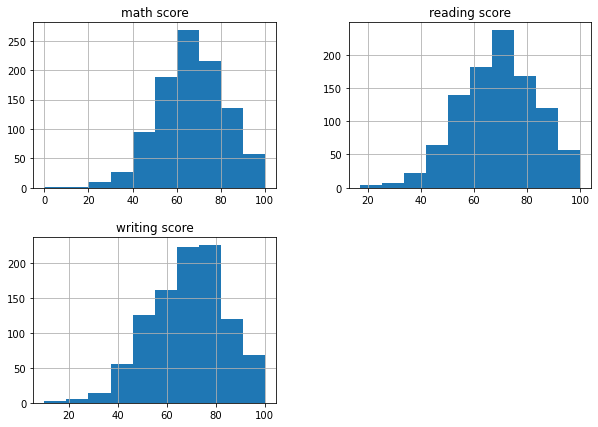

In [29]:
# Check distribution of each variable
student.hist(figsize=(10, 7))
plt.show()

C:\Users\HaoLE\AppData\Local\Temp\ipykernel_5728\3950230832.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(categories_counts[column].index, rotation= 45)
C:\Users\HaoLE\AppData\Local\Temp\ipykernel_5728\3950230832.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(categories_counts[column].index, rotation= 45)
C:\Users\HaoLE\AppData\Local\Temp\ipykernel_5728\3950230832.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(categories_counts[column].index, rotation= 45)
C:\Users\HaoLE\AppData\Local\Temp\ipykernel_5728\3950230832.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(categories_counts[column].index, rotation= 45)
C:\Users\HaoLE\AppData\Local\Temp\ipykernel_5728\3950230832.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ca

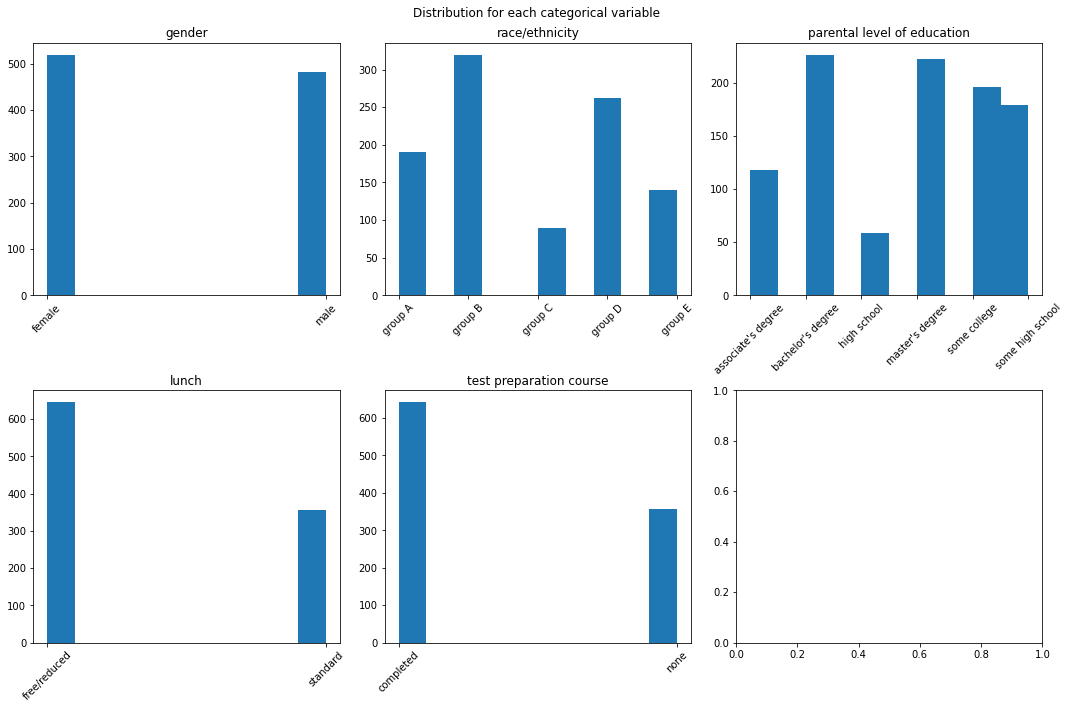

In [46]:
categories = student[["gender","race/ethnicity","parental level of education","lunch","test preparation course"]]
categories_counts = categories.apply(lambda x: x.value_counts()).T.stack()
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i,column in enumerate(categories.columns):
    ax =axes[i]
    ax.hist(categories[column])
    ax.set_title(column)
    ax.set_xticklabels(categories_counts[column].index, rotation= 45)
plt.suptitle("Distribution for each categorical variable")
plt.tight_layout()    
plt.show()

--> Data distribution of Student dataset is normal. There are no outliers and the categorical variables are not too unbalanced data.

## Preprocessing data

### For diabetes dataset
Since all are quantitative variables, after processing NA and outliers can apply MinMaxScaler or StandardScaler for normalizing data. Here we choose to use StandardScaler because MinMaxScaler is sensitive to outliers.

In [76]:
scaler = StandardScaler()
normalized_diabetes = scaler.fit_transform(diabetes)
normalized_diabetes_df = pd.DataFrame(normalized_diabetes, columns=diabetes.columns)
normalized_diabetes_df[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896


In [ ]:
#normalized_diabetes_df.to_csv("diabetes_output.csv",index=True)

### For student dataset, we have 4 types of variables:
- Nominal variable : race/ethnicity --> OneHotEncoder (variable represents distinct categories without any inherent ordinal relationship, just have 5 categories, simple) 
- Binary variable : gender, lunch --> LabelEncoder (suitable for variables with 2 categories)
- Ordinal variable : parental leval of education --> OrdinalEncoder (variable represents values with ordered or ranked categories)
- Quantitative variable : math score, reading score, writing score --> We don't need to m=normalize these quantitative variables because they have the same scale (max score = 100, min score = 0).

In [62]:
label = LabelEncoder()
binary_student = student[["gender","lunch"]]
labeled_student = binary_student.apply(lambda x: label.fit_transform(x))
labeled_student[:5]

,gender,lunch
0,0,1
1,0,1
2,0,1
3,1,0
4,1,1


In [83]:
parental_level = ["some high school","high school", "some college","associate's degree","bachelor's degree","master's degree"]
ordinal = OrdinalEncoder(categories=[parental_level])
parental_education = student[["parental level of education"]].values
ordinal_student = ordinal.fit_transform(parental_education)
ordinal_student_df = pd.DataFrame(ordinal_student, columns =["parental level of education"])
ordinal_student_df.head()

,parental level of education
0,4.0
1,2.0
2,5.0
3,3.0
4,2.0


In [80]:
nominal = student[["race/ethnicity"]]
nominal_2D = nominal.values.reshape(-1,1)
onehot = OneHotEncoder()
nominal_student = onehot.fit_transform(nominal_2D)
nominal_student_df = pd.DataFrame(nominal_student.toarray(), columns=onehot.get_feature_names(["race/ethnicity"]))
nominal_student_df.head()

C:\Users\HaoLE\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [89]:
student_output = pd.concat([labeled_student,ordinal_student_df,nominal_student_df, 
                            student[["math score","reading score","writing score"]]], axis = 1)
student_output.head()

,gender,lunch,parental level of education,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,math score,reading score,writing score
0,0,1,4.0,0.0,1.0,0.0,0.0,0.0,72,72,74
1,0,1,2.0,0.0,0.0,1.0,0.0,0.0,69,90,88
2,0,1,5.0,0.0,1.0,0.0,0.0,0.0,90,95,93
3,1,0,3.0,1.0,0.0,0.0,0.0,0.0,47,57,44
4,1,1,2.0,0.0,0.0,1.0,0.0,0.0,76,78,75


In [ ]:
#student_output.to_csv("student_output.csv",index=True)